# Test and example of usage for Function Creator

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend, Plot

In [2]:
class FunctionCreator:
    def __init__(self):
        """
        Initialize the FunctionCreator class attributes.
        
        Attributes:
            __x (sympy.Symbol): Symbolic variable used in the function expressions.
            PolyOrder (int): Randomly generated polynomial order between 1 and 4.
            base (int): Randomly generated base coefficient between -5 and 5.
            FunList (list): Predefined list of transcendental functions.
            fx (sympy.Expr): User-defined function, initially set to 0.
            __min_poly (int or None): Minimum polynomial order, initially None.
            __max_poly (int or None): Maximum polynomial order, initially None.
            __min_base (int or None): Minimum base coefficient, initially None.
            __max_base (int or None): Maximum base coefficient, initially None.
            __derivate_order (int): Current derivative order, initially set to 1.
        """
        
        self.__x = sym.symbols('x')
        self.PolyOrder = np.random.randint(1, 5)
        self.base = np.random.randint(-5, 6)
        
        # Lista di Funzioni Trascendentali
        self.FunList = [
            sym.cos(self.__x), 
            sym.sin(self.__x), 
            sym.exp(self.__x), 
            sym.log(self.__x), 
            1 + sym.exp(-self.__x)
        ]
        
        # Funzione Utente
        self.fx = 0
        
        # Attributi
        self.__min_poly = None
        self.__max_poly = None
        self.__min_base = None
        self.__max_base = None
        self.__derivate_order = 1
        
    # ------------------ Poly Order --------------------
    def set_poly_order(self, min_, max_):
        """
        Sets the minimum and maximum limits for the polynomial order.
    
        Randomly generates a polynomial order (`PolyOrder`) between `min_` and `max_`.
    
        Args:
            min_ (int): Minimum limit for the polynomial order.
            max_ (int): Maximum limit for the polynomial order.
        """
        self.__min_poly = min_
        self.__max_poly = max_
        self.PolyOrder = np.random.randint(self.__min_poly, self.__max_poly)
        
    def get_poly_order(self):
        """
        Returns the minimum and maximum limits for the polynomial order.
    
        Returns:
            tuple: A tuple containing the minimum and maximum limits for the polynomial order.
        """
        return (self.__min_poly, self.__max_poly)
            
    # ---------------------- Base ------------------------
    def set_base_range(self, min_base, max_base):
        """
        Sets the minimum and maximum limits for the base coefficient.
    
        Args:
            min_base (int): Minimum limit for the base coefficient.
            max_base (int): Maximum limit for the base coefficient.
        """
        self.__min_base = min_base
        self.__max_base = max_base
            
    def set_base(self):
        """
        Randomly generates a base coefficient (`base`) between the previously set minimum and maximum limits.
        """
        self.base = np.random.randint(self.__min_base, self.__max_base)
    
    # --------------------- Function ------------------------
    def add_function_to_list(self, new_function):
        """
        Adds a new function to the list of transcendental functions.
    
        Args:
            new_function (sympy function): The new function to add to the list of transcendental functions.
        
        Raises:
            Exception: If an error occurs while adding the new function.
        """
        try:
            self.FunList.append(new_function)
        except Exception as e:
            print(f"An error occurred: {e}")
                
    def make_numerator(self):
        """
        Creates the numerator of the user-defined function.
    
        The function combines polynomial terms and randomly selected transcendental functions from the `FunList`.
        """
        for i in range(1, self.PolyOrder):
            self.fx += self.base * self.__x**i
    
        transcend = np.random.choice(self.FunList, 2, replace=False)
        for f in transcend:
            self.fx += np.random.choice([-1, 1]) * f
            
    def make_denominator(self):
        """
        Creates the denominator of the user-defined function.
    
        Randomly selects a transcendental function from the `FunList` and uses it as the denominator of the user-defined function.
        """
        denom = np.random.choice(self.FunList, 1)[0]
        self.fx /= denom
            
    # ---------------- Derivates and Plot ------------------------
    def next_derivate(self):
        """
        Calculates the next derivative of the user-defined function.
    
        Increments the derivative order (`__derivate_order`) and calculates the derivative of the user-defined function (`fx`) with respect to the variable `x`.
        """
        self.__derivate_order += 1
        self.fx = sym.diff(self.fx, self.__x, self.__derivate_order)
            
    def plot_function(self):
        """
        Plots the current user-defined function (`fx`).
        """
        x = self.__x
        fx = self.fx
        
        # Create a plot object
        plot = sym.plot(fx, show=False, 
                        xlabel='x', ylabel='f(x)', line_color='blue')

        # plot customization
        plot[0].line_color = 'blue'
        plot[0].label = f'$f(x) = {sym.latex(fx)}$'
        plot.legend = True

        # Matplotlib backend for the grid
        backend = MatplotlibBackend(plot)
        backend.fig.suptitle(f'Plot of the function $f(x) = {sym.latex(fx)}$')

        for ax in backend.fig.axes:
            ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
            ax.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)
            ax.axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)

        backend.show()

   

            
    # ------------------- Reset Func ------------------------
    def reset_function(self):
        """
        Resets the user-defined function (`fx`) to 0.
        """
        self.fx = 0
    
    

## First Example

In [3]:
# class instance
fc = FunctionCreator()

# set order of polinome
fc.set_poly_order(1, 3)

# set the base range
fc.set_base_range(-5, 5)
fc.set_base()

In [4]:
fc.get_poly_order()

(1, 3)

In [5]:
fc.make_numerator()
fc.fx

x - log(x) + cos(x)

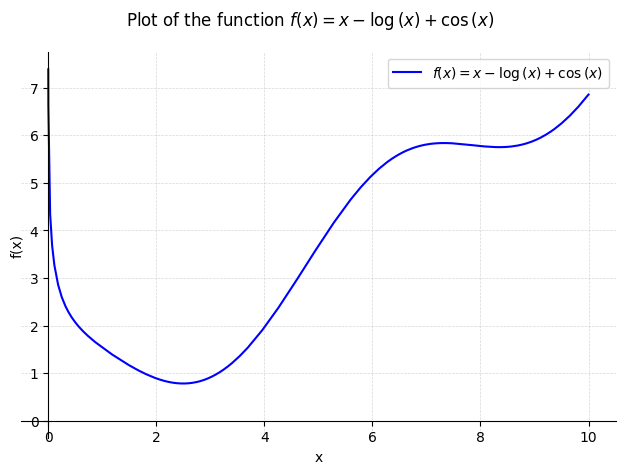

In [6]:
fc.plot_function()

In [7]:
fc.make_denominator()
fc.fx

(x - log(x) + cos(x))/(1 + exp(-x))

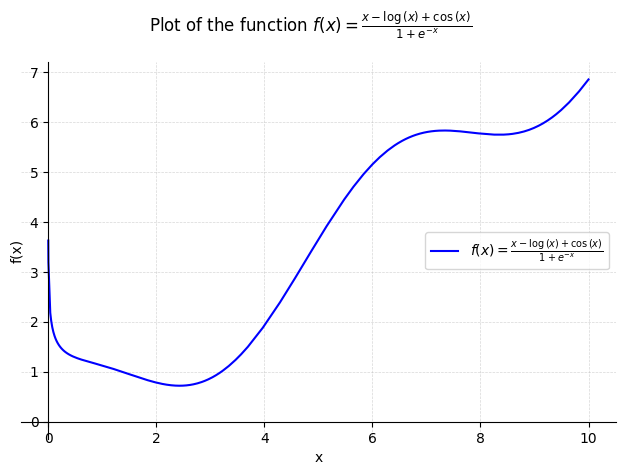

In [8]:
fc.plot_function()

In [9]:
fc.next_derivate()
fc.fx

-((1 - 2*exp(-x)/(1 + exp(-x)))*(x - log(x) + cos(x))*exp(-x)/(1 + exp(-x)) + cos(x) + 2*(sin(x) - 1 + 1/x)*exp(-x)/(1 + exp(-x)) - 1/x**2)/(1 + exp(-x))

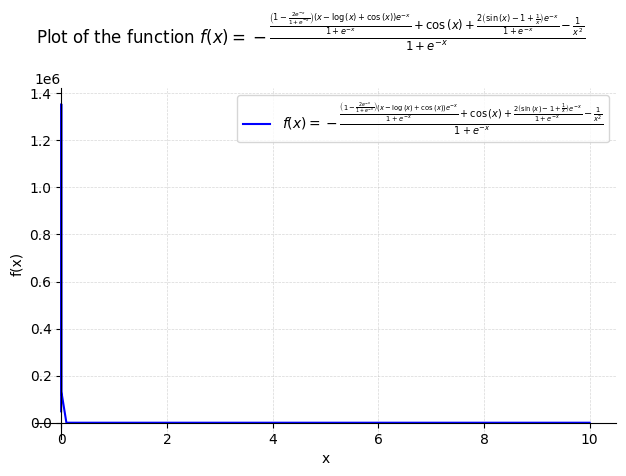

In [10]:
fc.plot_function()

In [11]:
fc.reset_function()

## Second Example 

In [12]:
# set order of polinome
fc.set_poly_order(1, 5)

# set the base range
fc.set_base_range(-2, 9)
fc.set_base()

In [13]:
fc.make_numerator()
fc.fx

-exp(x) - 1 - exp(-x)

In [14]:
fc.next_derivate()
fc.fx

-exp(x) + exp(-x)

In [15]:
fc.make_denominator()
fc.fx

(-exp(x) + exp(-x))/log(x)

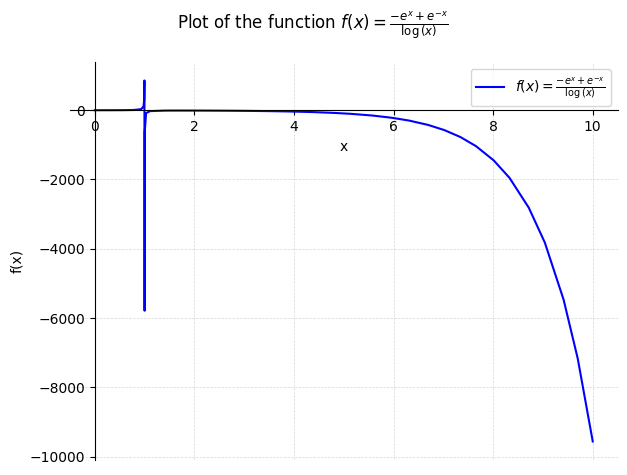

In [16]:
fc.plot_function()

In [17]:
fc.reset_function()

## Third Example

In [18]:
# set order of polinome
fc.set_poly_order(1, 12)

# set the base range
fc.set_base_range(-20, 20)
fc.set_base()

In [19]:
fc.make_numerator()
fc.fx

-sin(x) - cos(x)

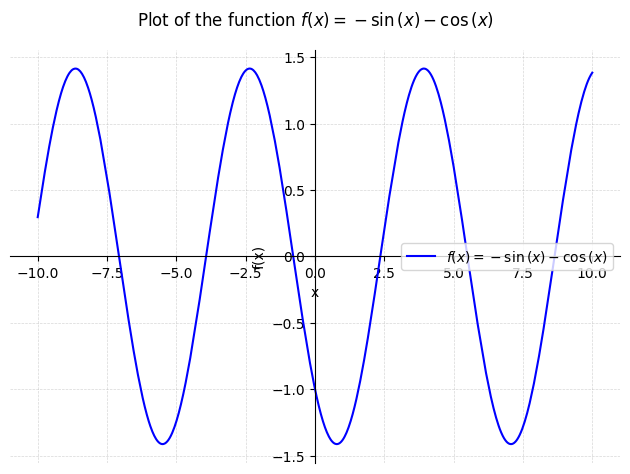

In [20]:
fc.plot_function()

In [21]:
fc.make_numerator()
fc.fx

-log(x) - sin(x)

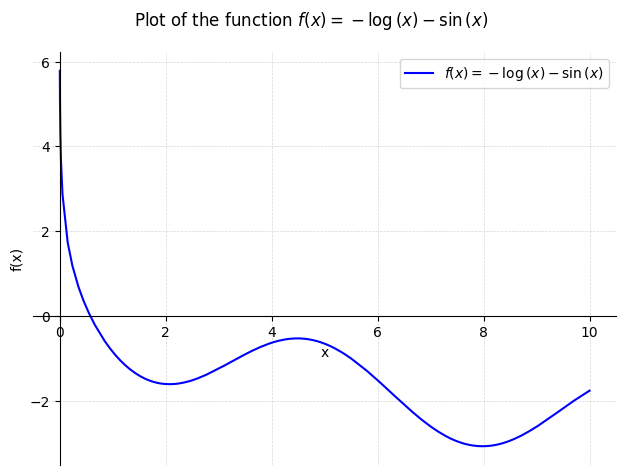

In [22]:
fc.plot_function()

In [23]:
fc.next_derivate()
fc.fx

-sin(x) + 6/x**4

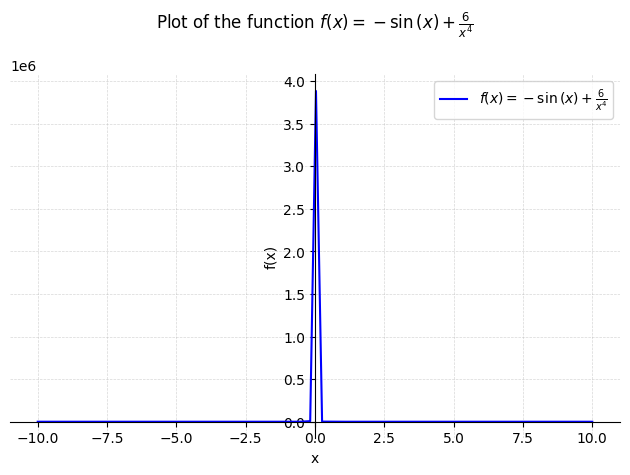

In [24]:
fc.plot_function()

In [25]:
fc.make_denominator()
fc.fx

(-sin(x) + 6/x**4)*exp(-x)

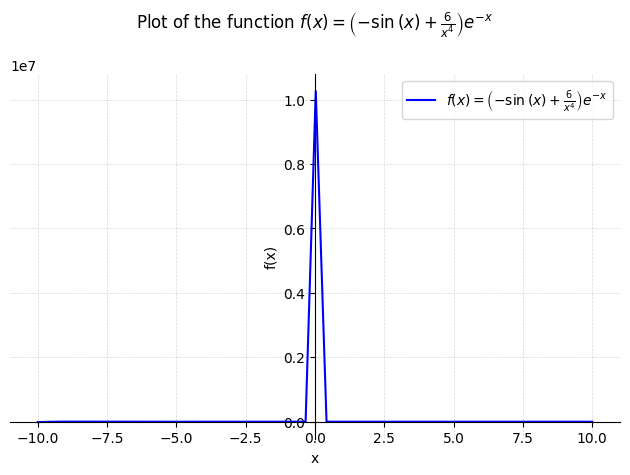

In [26]:
fc.plot_function()

In [27]:
fc.make_denominator()
fc.fx

(-sin(x) + 6/x**4)*exp(-x)/sin(x)

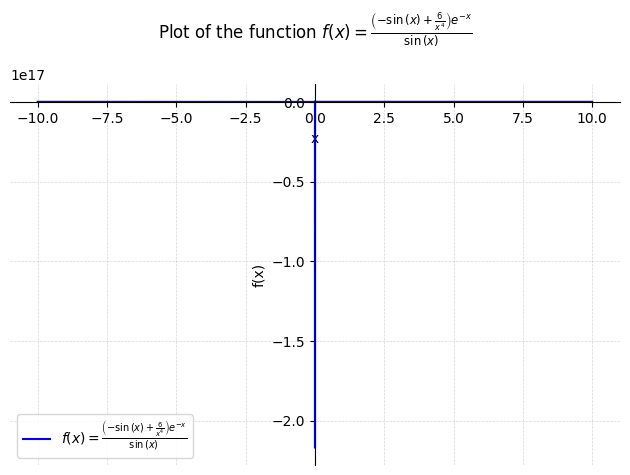

In [28]:
fc.plot_function()

In [29]:
fc.next_derivate()
fc.fx

(-30*(1 + 2*cos(x)**2/sin(x)**2)*(sin(x) + 120/x**6) + 10*(1 + 2*cos(x)**2/sin(x)**2)*(sin(x) - 6/x**4) + 10*(1 + 2*cos(x)**2/sin(x)**2)*(cos(x) - 720/x**7) - 30*(1 + 2*cos(x)**2/sin(x)**2)*(cos(x) + 24/x**5) - 10*(5 + 6*cos(x)**2/sin(x)**2)*(sin(x) + 120/x**6)*cos(x)/sin(x) + 10*(5 + 6*cos(x)**2/sin(x)**2)*(sin(x) - 6/x**4)*cos(x)/sin(x) - 20*(5 + 6*cos(x)**2/sin(x)**2)*(cos(x) + 24/x**5)*cos(x)/sin(x) + 5*(sin(x) - 5040/x**8)*cos(x)/sin(x) - 30*(sin(x) + 120/x**6)*cos(x)/sin(x) + 5*(sin(x) - 6/x**4)*(5 + 28*cos(x)**2/sin(x)**2 + 24*cos(x)**4/sin(x)**4) + (sin(x) - 6/x**4)*(61 + 180*cos(x)**2/sin(x)**2 + 120*cos(x)**4/sin(x)**4)*cos(x)/sin(x) + 5*(sin(x) - 6/x**4)*cos(x)/sin(x) + 20*(cos(x) - 720/x**7)*cos(x)/sin(x) - 5*(cos(x) + 24/x**5)*(5 + 28*cos(x)**2/sin(x)**2 + 24*cos(x)**4/sin(x)**4) - 20*(cos(x) + 24/x**5)*cos(x)/sin(x) - 4*sin(x) + 4*cos(x) - 6/x**4 - 120/x**5 - 1200/x**6 - 7200/x**7 - 25200/x**8 - 40320/x**9)*exp(-x)/sin(x)